# The meaning of thermal sensation degrees (-3 to +3)

PMV is an index that aims to predict the mean value of votes of a group of occupants on a seven-point thermal sensation scale. Thermal equilibrium is obtained when an occupant’s internal heat production is the same as its heat loss. The heat balance of an individual can be influenced by levels of physical activity, clothing insulation, as well as the parameters of the thermal environment. For example, thermal sensation is generally perceived as better when occupants of a space have control over indoor temperature (i.e., natural ventilation through opening or closing windows), as it helps to alleviate high occupant thermal expectations on a mechanical ventilation system.

Within the PMV index, +3 translates as too hot, while -3 translates as too cold, as depicted below.

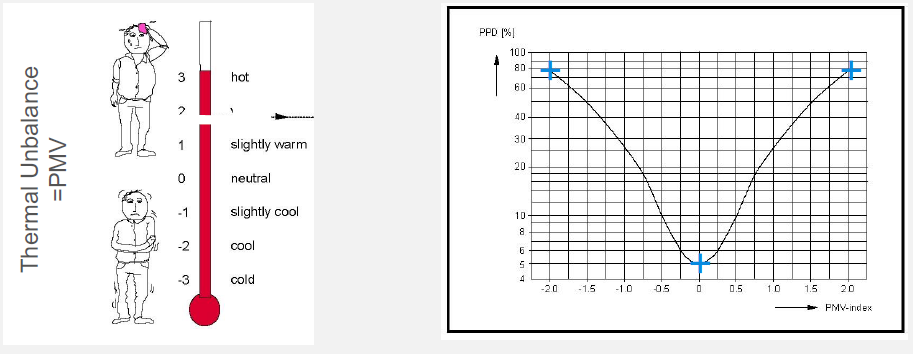

# Import required libraries

In this notebook I have used the ASHRAE Thermal Comfort Database II. which was introduced and cleaned by Clayton Miller in his edx course "Data Science for Construction, Architecture and Engineering"

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

import dataset (All rights to Clayton Miller)

In [4]:
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [5]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [6]:
ieq_data.describe()

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
count,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000
mean,2003.163621,0.127440,0.634063,1.177975,25.215932,51.553517,0.202853,0.128222
std,10.326515,1.125046,0.255987,0.251705,3.426420,14.709984,0.317471,1.127096
min,1982.000000,-3.000000,0.000000,0.700000,13.100000,0.500000,0.000000,-3.000000
25%,1994.000000,-0.500000,0.470000,1.000000,22.900000,41.400000,0.060000,0.000000
50%,2010.000000,0.000000,0.620000,1.100000,24.700000,51.600000,0.100000,0.000000
75%,2012.000000,1.000000,0.720000,1.200000,27.200000,62.400000,0.210000,1.000000
max,2016.000000,3.000000,2.870000,6.830000,48.800000,97.800000,6.540000,3.000000


In [7]:
ieq_data['Country'].value_counts()

India          15191
Brazil          7074
Australia       6940
USA             2950
UK              2056
Portugal        1558
Greece          1283
Thailand        1146
Sweden           940
Malaysia         869
Canada           867
Singapore        812
France           465
Germany          414
Iran             377
Philippines      277
Italy            229
Name: Country, dtype: int64

use the .pivot_table() function to chose a column (Country) as the index, another column as the pivoted vector (Thermal Sensation), and a value that is aggregated at these intersections (Outside air temperature):

In [9]:
ieq_data_pivoted = ieq_data.pivot_table(index='Country', columns='ThermalSensation_rounded', values='Air temperature (C)', aggfunc='mean')
ieq_data_pivoted

ThermalSensation_rounded,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Country,,,,,,,
Australia,22.077647,22.547732,22.852261,23.397811,24.380476,25.771105,26.885507
Brazil,22.836364,23.992857,24.025164,25.080711,26.459480,27.881450,28.317460
Canada,22.629630,22.824762,23.152778,23.366270,24.154762,24.703509,26.150000
France,21.425000,21.488889,22.760274,23.730128,24.630405,25.576119,28.862500
Germany,NaN,NaN,21.891667,24.311382,25.343750,NaN,27.228571
Greece,25.875000,26.835294,26.430631,28.266518,29.799083,30.904965,32.677778
India,22.498425,24.942129,25.219574,25.765046,27.973600,29.776419,30.801503
Iran,NaN,16.513333,17.825806,20.526882,22.257143,NaN,NaN
Italy,NaN,25.233333,25.261905,25.082836,26.109756,26.105882,27.190000


# Use visualization to see the effect of temperature on thermal sensation

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

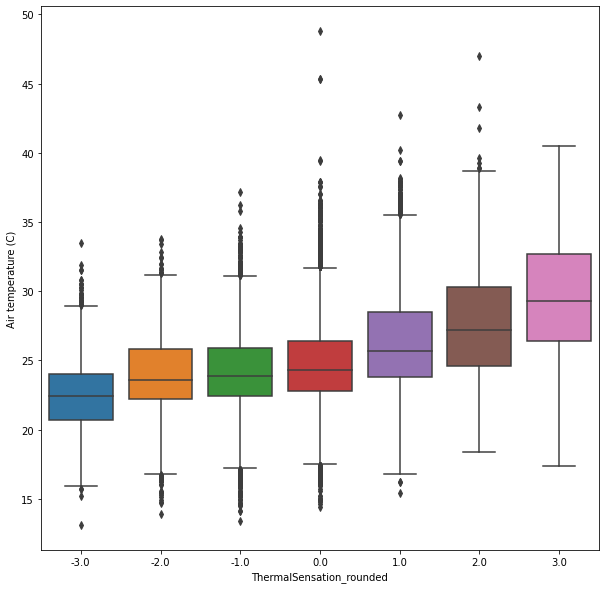

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)

# Use visualization to see the effect of relative humidity on thermal sensation

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Relative humidity (%)'>

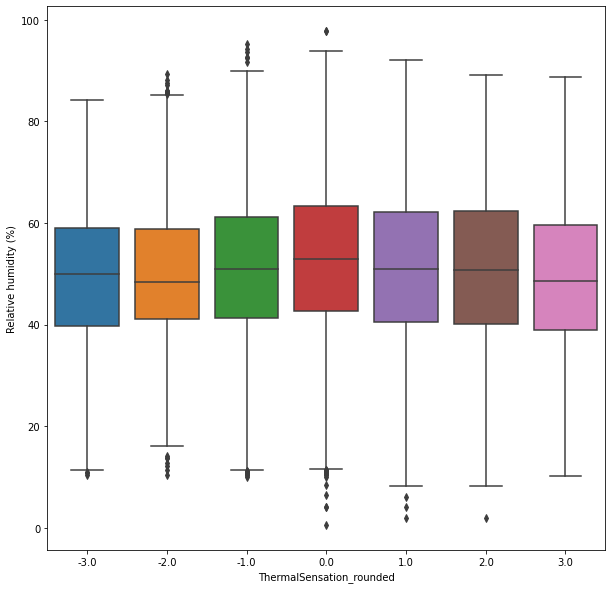

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Relative humidity (%)", data=ieq_data)

# Use visualization to see the effect of Air velocity on thermal sensation

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Air velocity (m/s)'>

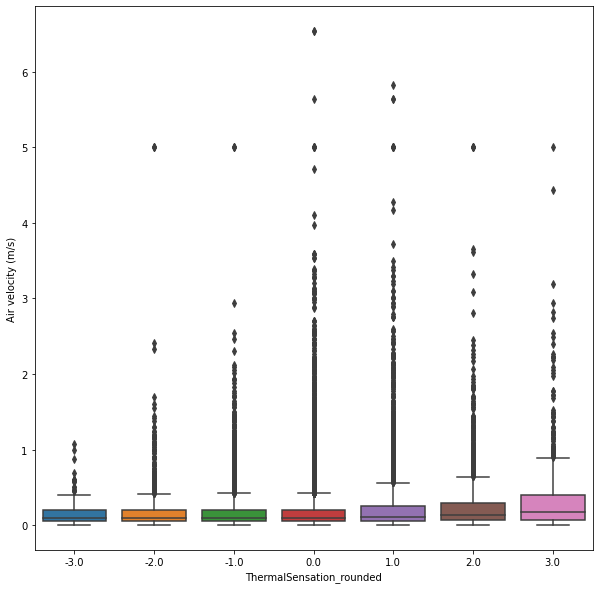

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air velocity (m/s)", data=ieq_data)

# The effect of gender on thermal sensation

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

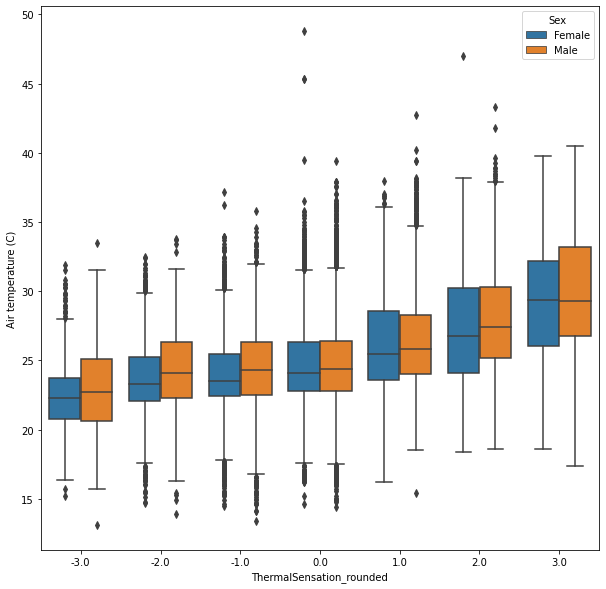

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Sex", data=ieq_data)

# The effect of Metablolic activity and clothing on thermal sensation

In [20]:
ieq_data["Met_rounded"]= ieq_data["Met"].round(0)
ieq_data["Clo_rounded"]= ieq_data["Clo"].round(0)

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

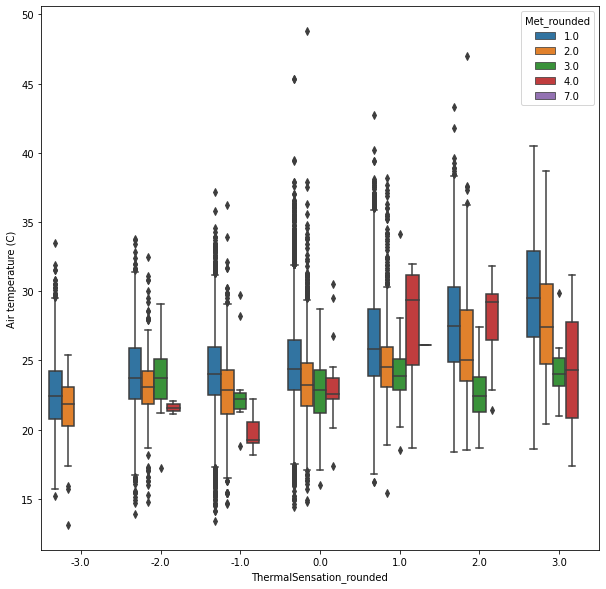

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Met_rounded", data=ieq_data)

<AxesSubplot:xlabel='ThermalSensation_rounded', ylabel='Air temperature (C)'>

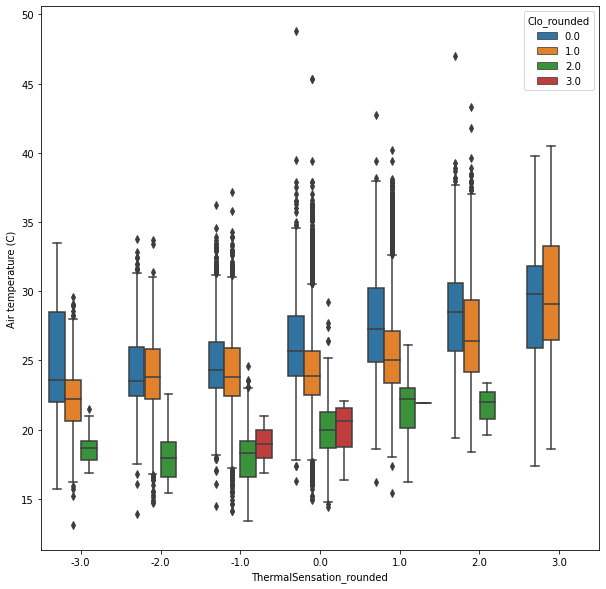

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Clo_rounded", data=ieq_data)

# The effect of building type on thermal sensation

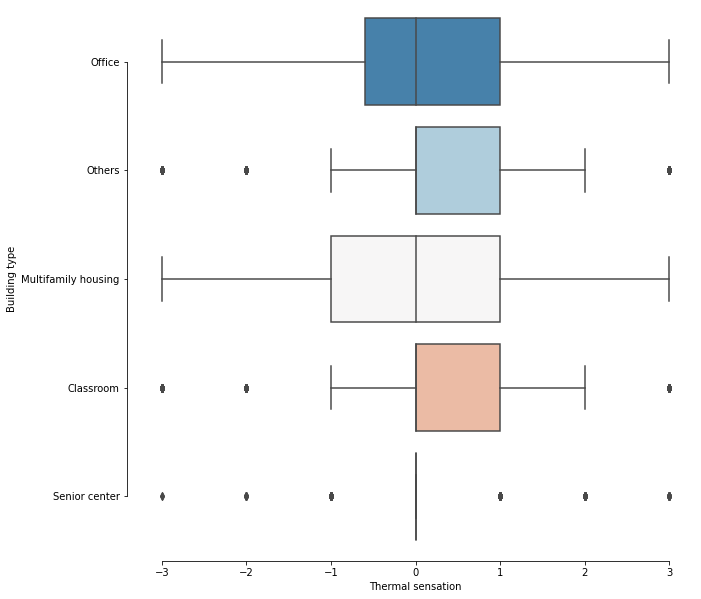

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Building type", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Building type","Thermal sensation","Sex"]].dropna())

sns.despine(offset=10, trim=True)

# The effect of cooling strategy on thermal sensation

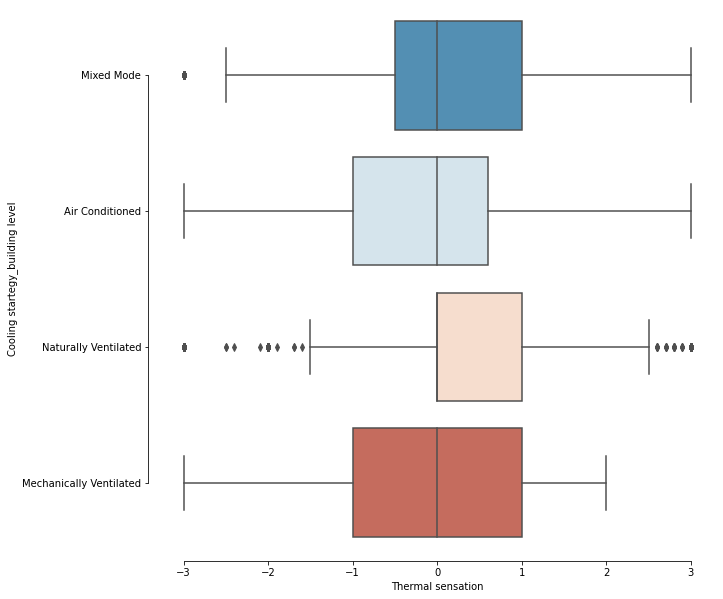

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,10)
sns.boxplot(y="Cooling startegy_building level", x="Thermal sensation",
             palette="RdBu_r",
            data=ieq_data[["Cooling startegy_building level","Thermal sensation"]].dropna())

sns.despine(offset=10, trim=True)

# The effect of country on thermal sensation

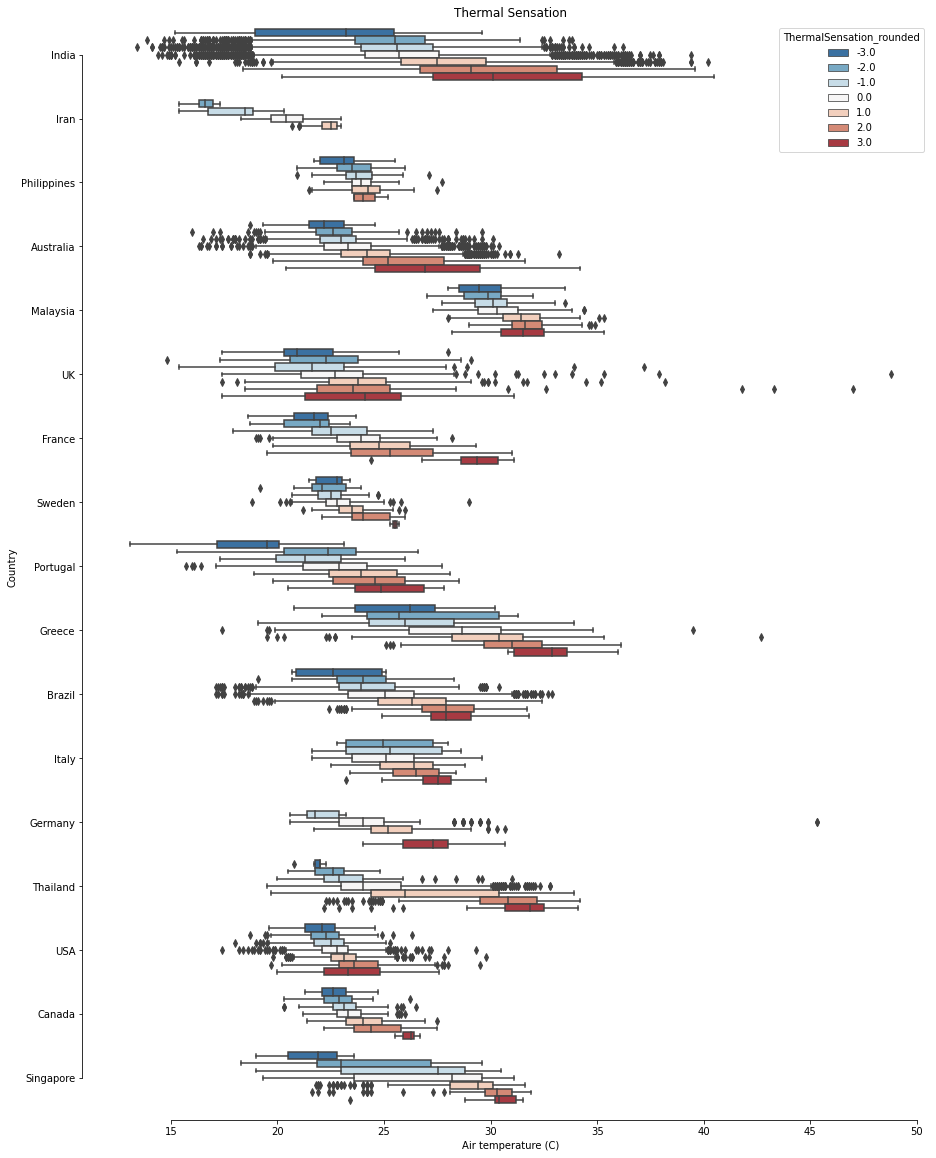

In [25]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,20)
sns.boxplot(y="Country", x="Air temperature (C)",
            hue="ThermalSensation_rounded", palette="RdBu_r",
            data=ieq_data[["Country","Air temperature (C)","ThermalSensation_rounded"]].dropna())
plt.title("Thermal Sensation")
sns.despine(offset=10, trim=True)